In [55]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from catboost import CatBoostError
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv('hakaton_data_1617_train.csv', encoding='cp1251')

In [178]:
target = pd.read_csv('train.csv', encoding='cp1251')

In [336]:
category_names = ['Супермаркеты', 'Транспорт', 'Фаст Фуд', 'Разные товары',
       'Топливо', 'ДомРемонт', 'Рестораны', 'Спорттовары', 'Развлечения',
       'Красота', 'ОдеждаОбувь', 'Авиабилеты', 'СвязьТелеком',
       'Сервисные услуги', 'Кино', 'Книги', 'Медицинские услуги',
       'Турагентства', 'Аптеки', 'Госсборы', 'Автоуслуги', 'Животные',
       'Сувениры', 'Жд билеты', 'Цветы', 'НКО', 'Частные услуги',
       'Финансовые услуги', 'ФотоВидео', 'Duty Free', 'Отели', 'Музыка',
       'Искусство', 'Аренда авто', 'Образование']

y_categories = [cat_name + '_y' for cat_name in category_names]



In [9]:
del data

In [10]:
cat_features = ['education_level', 'gender_cd', 'marital_status']

In [16]:
def fit_models(data):
    global category_names, y_categories, cat_features
    models_dict = {}
    
    for i, cat in enumerate(category_names[::-1]):
        print('cat:', cat)
        models_dict[cat] = CatBoostClassifier(eval_metric='F1', task_type='GPU')
        
        
        y = data[cat + '_y']
        X = data.drop(y_categories + ['customer_rk'], axis=1)
        
        print('datasets comlited')
        print('fitting started')
        models_dict[cat].fit(X, y, cat_features=cat_features, silent=True)
        

        print('{} out of {}'.format(i, len(category_names)))
        models_dict[cat].save_model('model_{}.cbm'.format(cat))
        print('model_{}.cbm saved'.format(cat))

    
    return models_dict

# Final preds

In [324]:
base = pd.read_csv('final_v2.csv')

In [331]:
base = base.drop(category_names, axis=1)

In [321]:
final = pd.read_csv('test.csv')

In [322]:
final.head()

,mean_Супермаркеты_2016-01,mean_Супермаркеты_2016-02,mean_Супермаркеты_2016-03,mean_Супермаркеты_2016-04,mean_Супермаркеты_2016-05,mean_Супермаркеты_2016-06,mean_Супермаркеты_2016-07,mean_Супермаркеты_2016-08,mean_Супермаркеты_2016-09,mean_Супермаркеты_2016-10,...,count_Аренда авто_2017-10,count_Аренда авто_2017-11,count_Аренда авто_2017-12,count_Аренда авто_2018-01,age,education_level,marital_status,children_cnt,gender_cd,customer_rk
0,0.0,0.0,0.0,0.0,0.0,0.000000,1510.000000,2292.000000,626.000000,564.482759,...,0.0,0.0,0.0,0.0,30,"Начальное, среднее",Женат/замужем,1,M,40001
1,0.0,0.0,0.0,0.0,0.0,370.000000,0.000000,390.000000,262.000000,290.000000,...,0.0,0.0,0.0,0.0,40,Высшее,Женат/замужем,0,M,40002
2,0.0,0.0,0.0,0.0,1540.0,229.375000,833.333333,503.793103,412.307692,423.548387,...,0.0,0.0,0.0,0.0,30,Высшее,Холост/не замужем,0,M,40003
3,0.0,0.0,0.0,0.0,310.0,0.000000,467.727273,260.000000,412.777778,386.315789,...,0.0,0.0,0.0,0.0,40,Высшее,Холост/не замужем,0,F,40004
4,0.0,0.0,0.0,0.0,0.0,848.888889,465.000000,974.000000,238.000000,640.000000,...,0.0,0.0,0.0,0.0,25,Высшее,Холост/не замужем,0,M,40005


In [320]:
columns_to_add = ['count_Duty Free_2016-01',
'count_Duty Free_2016-02',
'count_Duty Free_2016-04',
'count_Аренда авто_2016-02',
'count_Аренда авто_2016-04',
'count_Искусство_2016-01',
'count_Искусство_2016-04',
'count_Искусство_2016-07',
'count_Искусство_2018-01',
'count_Образование_2016-01',
'count_Образование_2016-05',
'count_Образование_2016-06',
'count_Образование_2016-07',
'count_Образование_2016-09',
'count_Образование_2018-01',
'mean_Duty Free_2016-01',
'mean_Duty Free_2016-02',
'mean_Duty Free_2016-04',
'mean_Аренда авто_2016-02',
'mean_Аренда авто_2016-04',
'mean_Искусство_2016-01',
'mean_Искусство_2016-04',
'mean_Искусство_2016-07',
'mean_Искусство_2018-01',
'mean_Образование_2016-01',
'mean_Образование_2016-05',
'mean_Образование_2016-06',
'mean_Образование_2016-07',
'mean_Образование_2016-09',
'mean_Образование_2018-01']

In [323]:
for col in columns_to_add:
    final[col] = np.zeros(final.shape[0])

In [327]:
final.shape

(10000, 1756)

In [13]:
rename_dict = {}
for i,j in zip(category_names, y_categories):
    rename_dict[i] = j

In [14]:
final = final.rename(columns=rename_dict)

In [22]:
final.columns = [i.replace('/', '') for i in final.columns]

In [334]:
def load_model():
    global category_names
    res_dict = {}
    for cat in category_names:
        res_dict[cat] = CatBoostClassifier()
        res_dict[cat].load_model('models/model_{}.cbm'.format(cat))
        print('{} loaded'.format(cat))
    return res_dict

In [337]:
model_dict = load_model()

Супермаркеты loaded
Транспорт loaded
Фаст Фуд loaded
Разные товары loaded
Топливо loaded
ДомРемонт loaded
Рестораны loaded
Спорттовары loaded
Развлечения loaded
Красота loaded
ОдеждаОбувь loaded
Авиабилеты loaded
СвязьТелеком loaded
Сервисные услуги loaded
Кино loaded
Книги loaded
Медицинские услуги loaded
Турагентства loaded
Аптеки loaded
Госсборы loaded
Автоуслуги loaded
Животные loaded
Сувениры loaded
Жд билеты loaded
Цветы loaded
НКО loaded
Частные услуги loaded
Финансовые услуги loaded
ФотоВидео loaded
Duty Free loaded
Отели loaded
Музыка loaded
Искусство loaded
Аренда авто loaded
Образование loaded


In [329]:
category_names = ['Супермаркеты', 'Транспорт', 'Фаст Фуд', 'Разные товары',
       'Топливо', 'Дом/Ремонт', 'Рестораны', 'Спорттовары', 'Развлечения',
       'Красота', 'Одежда/Обувь', 'Авиабилеты', 'Связь/Телеком',
       'Сервисные услуги', 'Кино', 'Книги', 'Медицинские услуги',
       'Турагентства', 'Аптеки', 'Госсборы', 'Автоуслуги', 'Животные',
       'Сувениры', 'Ж/д билеты', 'Цветы', 'НКО', 'Частные услуги',
       'Финансовые услуги', 'Фото/Видео', 'Duty Free', 'Отели', 'Музыка',
       'Искусство', 'Аренда авто', 'Образование']

y_categories = [cat_name + '_y' for cat_name in category_names]



In [ ]:
final = final.drop(category_names, axis=1)

In [338]:
def make_preds(model_dict, X_test):
    global category_names
    preds_df = pd.DataFrame()
    preds_df['customer_rk'] = X_test['customer_rk']
    X_test = X_test.drop('customer_rk', axis=1)
    for cat in category_names:
        try:
            pred = model_dict[cat].predict(X_test.values)
        except CatBoostError:
            pred = np.zeros(X_test.shape[0])
            print('cat error')
        preds_df[cat] = pred
        print('{} predicted'.format(cat))
    return preds_df
        

In [339]:
def f1_score(v, trushnie):
    TP = np.sum([(v==trushnie)&(trushnie==1)])
    FP = np.sum([(v!=trushnie)&(trushnie==0)])
    FN = np.sum([(v!=trushnie)&(trushnie==1)])

    
    if FP + TP == 0 or TP + FN == 0:
        return 0     
    
    precision = TP/(FP + TP)
    recall = TP/(TP + FN)
    if precision == 0 or recall == 0:
        return 0     
    else:
        res = 2*precision*recall/(precision+recall)
        if np.isnan(res):
            print(precision, recall)
        return res
    
    
def get_score(true, pred):
    fs = []
    length = len(pred)
    j = 0
    for i in range(length):
        if (true.iloc[j].values[0] != pred.iloc[i].values[0]):
            continue
        f1 = f1_score(pred.iloc[i].values[1:], true.iloc[j].values[1:], )

        fs.append(f1)
        j += 1
        
    score = np.mean(np.array(fs))
    return score

In [340]:
category_names = ['Супермаркеты', 'Транспорт', 'Фаст Фуд', 'Разные товары',
       'Топливо', 'ДомРемонт', 'Рестораны', 'Спорттовары', 'Развлечения',
       'Красота', 'ОдеждаОбувь', 'Авиабилеты', 'СвязьТелеком',
       'Сервисные услуги', 'Кино', 'Книги', 'Медицинские услуги',
       'Турагентства', 'Аптеки', 'Госсборы', 'Автоуслуги', 'Животные',
       'Сувениры', 'Жд билеты', 'Цветы', 'НКО', 'Частные услуги',
       'Финансовые услуги', 'ФотоВидео', 'Duty Free', 'Отели', 'Музыка',
       'Искусство', 'Аренда авто', 'Образование']

y_categories = [cat_name + '_y' for cat_name in category_names]



In [341]:
preds_test = make_preds(model_dict, final)

Супермаркеты predicted
Транспорт predicted
Фаст Фуд predicted
Разные товары predicted
Топливо predicted
ДомРемонт predicted
Рестораны predicted
Спорттовары predicted
Развлечения predicted
Красота predicted
ОдеждаОбувь predicted
Авиабилеты predicted
СвязьТелеком predicted
Сервисные услуги predicted
Кино predicted
Книги predicted
Медицинские услуги predicted
Турагентства predicted
Аптеки predicted
Госсборы predicted
Автоуслуги predicted
Животные predicted
Сувениры predicted
Жд билеты predicted
Цветы predicted
НКО predicted
Частные услуги predicted
Финансовые услуги predicted
ФотоВидео predicted
Duty Free predicted
Отели predicted
Музыка predicted
Искусство predicted
Аренда авто predicted
Образование predicted


In [343]:
preds_test = preds_test.astype(np.int32)

In [349]:
preds_test.to_csv('hack_black_swan.csv', index=False)

In [361]:
preds_test[['customer_rk'] + list(target.columns)[1:]]

,customer_rk,Госсборы,Животные,Образование,Топливо,Сервисные услуги,НКО,ФотоВидео,Аренда авто,Развлечения,...,Рестораны,Кино,Авиабилеты,Цветы,Отели,Разные товары,ДомРемонт,Турагентства,Жд билеты,Медицинские услуги
0,40001,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,40003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40004,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,40005,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,40006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,40007,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,40008,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,40009,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,40010,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [352]:
preds_test.head()

,customer_rk,Супермаркеты,Транспорт,Фаст Фуд,Разные товары,Топливо,ДомРемонт,Рестораны,Спорттовары,Развлечения,...,НКО,Частные услуги,Финансовые услуги,ФотоВидео,Duty Free,Отели,Музыка,Искусство,Аренда авто,Образование
0,40001,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40002,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,40003,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40004,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40005,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [350]:
for col in preds_test.columns:
    print(col,np.mean(preds_test[col]))

customer_rk 45000.5
Супермаркеты 0.9392
Транспорт 0.6886
Фаст Фуд 0.7605
Разные товары 0.2681
Топливо 0.2802
ДомРемонт 0.1997
Рестораны 0.1405
Спорттовары 0.0153
Развлечения 0.0288
Красота 0.063
ОдеждаОбувь 0.225
Авиабилеты 0.0104
СвязьТелеком 0.1102
Сервисные услуги 0.1726
Кино 0.0455
Книги 0.0125
Медицинские услуги 0.0014
Турагентства 0.0003
Аптеки 0.1036
Госсборы 0.011
Автоуслуги 0.0049
Животные 0.0208
Сувениры 0.0
Жд билеты 0.0306
Цветы 0.0015
НКО 0.0158
Частные услуги 0.0001
Финансовые услуги 0.0155
ФотоВидео 0.0002
Duty Free 0.0
Отели 0.0001
Музыка 0.231
Искусство 0.0002
Аренда авто 0.0119
Образование 0.0003


In [204]:
target.columns = [i.replace('/', '') for i in target.columns]

In [205]:
preds_test = preds_test[['customer_rk'] + list(target.columns)[1:]]

In [210]:
score = get_score(target, preds_test)

In [211]:
score

0.7045854634519294

In [278]:
i = 30

In [313]:
rand_data = final[[i for i in final.columns if i.startswith('mean_Рестораны')]].iloc[2].values

In [314]:
lower, upper = np.percentile(rand_data, [2.5, 97.5])

In [284]:
X = [i for i in range(1, 25)]

In [285]:
final[[i for i in final.columns if i.startswith('mean_Супермаркеты')]].iloc[i].values.shape

(25,)

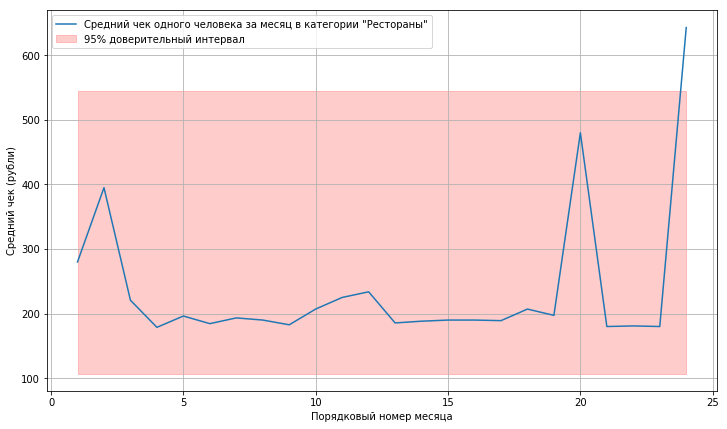

In [317]:
fig = plt.figure(figsize=(12,7))
plt.plot(X, final[[i for i in final.columns if i.startswith('mean_Рестораны')]].iloc[2].values[:-1],
         label='Средний чек одного человека за месяц в категории "Рестораны"')
plt.fill_between(X, lower, upper, alpha=.2, color='r', label='95% доверительный интервал')
plt.xlabel('Порядковый номер месяца');
plt.ylabel('Средний чек (рубли)')
plt.legend(loc='best')
plt.grid()
plt.show();